In [1]:
import pickle
import numpy as np

# file = "res_woReOpt_500"
# file = "res_cluster"

# file = "res_wReOpt_500"
# file = "res_VRP"
# file = "res_VRP_fullDyn"
# file = "res_VRP_DoD100_Q100"
# file = "res_TSP_DoD100_Q100"
# file = "res_VRP4_DoD100_Q100"
# file = "res_VRP4_DoD100_Q50"
file = "res_VRP2_DoD100_Q100_cluster"

w = 'wReOpt'
wo = 'woReOpt'
# file = "res_TSP"
# file = "res_TSP_fullDynamic"
with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

# with open(f'results/{file}/res_SL.pkl', "rb") as f:
#     res_SL = pickle.load(f)

# with open(f'results/{file}/res_MSA.pkl', "rb") as f:
#     res_MSA = pickle.load(f)

with open(f'results/{file}/{w}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)

# with open(f'results/{file}/{wo}/res_greedy.pkl', "rb") as f:
#     res_greedy_wo = pickle.load(f)

# with open(f'results/{file}/{wo}/res_random.pkl', "rb") as f:
#     res_random_wo = pickle.load(f)

{'horizon': 50, 'Q': 100, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'costs_KM': [1, 1], 'emissions_KM': [0.1, 0.3], 'cluster_scenario': True, 'test': True}


In [2]:
from methods.agent import RLAgent
from envs import DynamicQVRPEnv

In [3]:
env_configs['vehicle_assignment'] = True
# env_configs['static_as_dynamic'] = True
# env_configs['noise_horizon'] = .2
env_configs['re_optimization'] = False
# env_configs['unknown_p'] = True
env_configs['test'] = False
env_configs['n_scenarios'] = 500
env_configs['k_med'] = 7

env = DynamicQVRPEnv(**env_configs)
agent = RLAgent(
    env, 
    env_configs=env_configs, 
    algo=f'DQN_clusters_VRP{len(env_configs['emissions_KM'])}Q{env_configs['Q']}_VA',
    load_model=False,
)

In [4]:
test_rs = agent.train(5000)

0 : 0.000
200  :  17.534653465346533
best ! mean rewards : 17.535
400  :  29.871287128712872
best ! mean rewards : 29.871
600  :  30.722772277227723
best ! mean rewards : 30.723
800  :  30.376237623762375
1000  :  31.06930693069307
best ! mean rewards : 31.069
1200  :  31.88118811881188
best ! mean rewards : 31.881
1400  :  30.742574257425744
1600  :  32.06930693069307
best ! mean rewards : 32.069
1800  :  31.85148514851485
2000  :  32.0990099009901
best ! mean rewards : 32.099
2200  :  31.752475247524753
2400  :  31.178217821782177
2600  :  31.871287128712872
2800  :  31.495049504950494
3000  :  31.89108910891089
3200  :  31.198019801980198
3400  :  31.019801980198018
3600  :  31.564356435643564
3800  :  31.81188118811881
4000  :  31.613861386138613
4200  :  31.366336633663366
4400  :  31.504950495049506
4600  :  31.445544554455445
4800  :  31.485148514851485
5000  :  31.861386138613863
Complete


FileNotFoundError: [Errno 2] No such file or directory: 'methods/ML/models/model_DQN_clusters_VRP2Q100_VA'

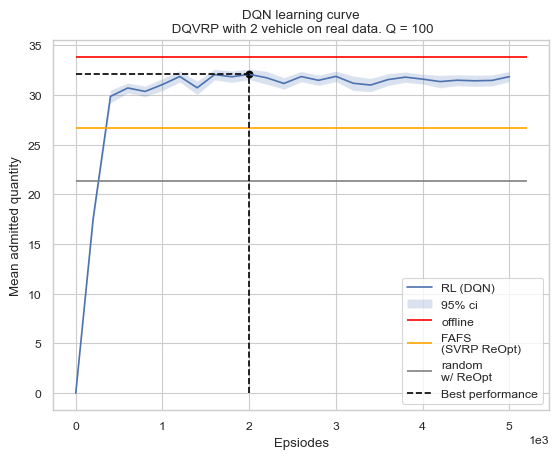

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("deep")
sns.set_theme('paper', 'whitegrid')

test_rs = np.load('results/rewards_DQN_clusters_VRP2Q100_VA.npy')
eval_every = 200
y_test = np.mean(test_rs, 1)
arg_max = np.argmax(y_test)
std_test = np.std(test_rs, 1)/np.sqrt(len(test_rs[0]))
plt.plot(eval_every*np.arange(len(y_test)), y_test, label="RL (DQN)")
plt.fill_between(
    eval_every*np.arange(len(y_test)), 
    y_test - 2*std_test, 
    y_test + 2*std_test, 
    alpha=0.2,
    label = "95% ci")

# plt.hlines(res_SL["rs"].mean(), 0, eval_every*len(y), 'black', label="SL", linestyles='--')
plt.hlines(res_offline["rs"].mean(), 0, eval_every*len(y_test), 'red', label="offline", linestyles='solid')
plt.hlines(res_greedy["rs"].mean(), 0, eval_every*len(y_test), 'orange', label="FAFS\n(SVRP ReOpt)", linestyles='solid')
plt.hlines(res_random["rs"].mean(), 0, eval_every*len(y_test), 'gray', label="random\nw/ ReOpt", linestyles='solid')

plt.hlines(y_test[arg_max], 0, eval_every*arg_max, 'black', label="Best performance", linestyles='dashed')
plt.vlines(eval_every*arg_max, np.amin(y_test), y_test[arg_max], 'black', linestyles='dashed')
plt.scatter(eval_every*arg_max, y_test[arg_max], c  = 'black')#, label="Best performance", linestyles='dashed')
# plt.hlines(res_greedy_wo["rs"].mean(), 0, eval_every*len(y_test), 'orange', label="greedy", linestyles='--')
# plt.hlines(y_test[0], 0, eval_every*len(y_test), 'gray', label="random⁄⁄⁄", linestyles='--')


plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xlabel('Epsiodes')
plt.ylabel('Mean admitted quantity')
plt.title(f'DQN learning curve\n DQVRP with {len(env_configs['emissions_KM'])} vehicle on synthetic data. Q = {env_configs["Q"]}')
plt.legend()
plt.show()